In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 

In [113]:
traindf = pd.read_csv('/content/Admission_Predict.csv')

In [114]:
traindf.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [115]:
traindf.drop(columns=['Serial No.'], inplace=True)

In [116]:
traindf.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [117]:
y = traindf.iloc[:, -1]

In [118]:
X = traindf.iloc[:, :-1]

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


In [120]:
X_train.shape

(320, 7)

In [121]:
X_test.shape

(80, 7)

In [122]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [123]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
X_train_scaled

array([[0.52      , 0.64285714, 0.5       , ..., 0.875     , 0.63461538,
        1.        ],
       [0.58      , 0.5       , 0.5       , ..., 0.5       , 0.38461538,
        1.        ],
       [0.7       , 0.67857143, 0.5       , ..., 0.625     , 0.60897436,
        0.        ],
       ...,
       [0.3       , 0.39285714, 0.25      , ..., 0.625     , 0.42628205,
        0.        ],
       [0.64      , 0.78571429, 1.        , ..., 0.75      , 0.68589744,
        1.        ],
       [0.34      , 0.46428571, 0.25      , ..., 0.625     , 0.41666667,
        0.        ]])

In [125]:
X_test_scaled

array([[0.4       , 0.5       , 0.75      , 0.875     , 0.875     ,
        0.71794872, 1.        ],
       [0.54      , 0.53571429, 0.5       , 0.625     , 0.5       ,
        0.6025641 , 1.        ],
       [0.6       , 0.42857143, 0.5       , 0.625     , 0.875     ,
        0.49358974, 1.        ],
       [1.        , 1.        , 0.75      , 1.        , 1.        ,
        0.86538462, 1.        ],
       [0.3       , 0.46428571, 0.25      , 0.5       , 0.75      ,
        0.42628205, 0.        ],
       [0.22      , 0.42857143, 0.25      , 0.625     , 0.625     ,
        0.34935897, 1.        ],
       [0.74      , 0.71428571, 0.5       , 0.5       , 0.5       ,
        0.61538462, 1.        ],
       [0.34      , 0.35714286, 0.5       , 0.5       , 0.5       ,
        0.47115385, 0.        ],
       [0.68      , 0.71428571, 0.75      , 0.75      , 0.625     ,
        0.63141026, 1.        ],
       [0.62      , 0.64285714, 0.5       , 0.625     , 1.        ,
        0.65705128, 1. 

In [126]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))


In [127]:
model.compile(loss='mean_squared_error',  optimizer='Adam')

In [128]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 7)                 56        
                                                                 
 dense_18 (Dense)            (None, 7)                 56        
                                                                 
 dense_19 (Dense)            (None, 3)                 24        
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [129]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 19ms/step - loss: 0.0518 - val_loss: 0.0432
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0437 - val_loss: 0.0372
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0368 - val_loss: 0.0308
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0306 - val_loss: 0.0250
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0254 - val_loss: 0.0203
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.0162
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0168 - val_loss: 0.0126
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0139 - val_loss: 0.0095
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0077
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0068
Epoch 11/100
8/8 [==========

In [130]:
y_pred = model.predict(X_test_scaled)

In [131]:
y_pred

array([[0.8005395 ],
       [0.7340976 ],
       [0.7137983 ],
       [0.94162655],
       [0.6433618 ],
       [0.5813409 ],
       [0.76318824],
       [0.6354114 ],
       [0.79180396],
       [0.7856569 ],
       [0.5775182 ],
       [0.69935596],
       [0.6590725 ],
       [0.7225393 ],
       [0.93204176],
       [0.693908  ],
       [0.6421989 ],
       [0.6507734 ],
       [0.9050156 ],
       [0.6821444 ],
       [0.7243773 ],
       [0.6108184 ],
       [0.46271396],
       [0.51273453],
       [0.6497195 ],
       [0.9020325 ],
       [0.6425438 ],
       [0.4402441 ],
       [0.66882026],
       [0.51277256],
       [0.9026282 ],
       [0.9680197 ],
       [0.9450996 ],
       [0.54261756],
       [0.6864903 ],
       [0.6541209 ],
       [0.75343645],
       [0.7740649 ],
       [0.6930909 ],
       [0.76429176],
       [0.7136589 ],
       [0.76421106],
       [0.925575  ],
       [0.71862304],
       [0.8805586 ],
       [0.80081236],
       [0.65353453],
       [0.809

In [132]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.751412249173713

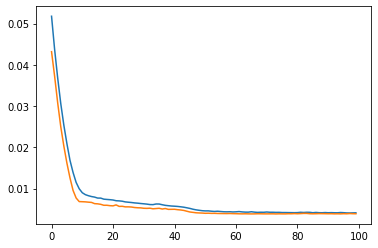

In [137]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])